# PROJET 4    Anticipez les besoins en consommation électrique de bâtiments

In [114]:
# IMPORT LIBRAIRIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
import time
import missingno as msno
# from sklearn import decomposition
# from sklearn import preprocessing
%matplotlib inline

In [115]:
# CONFIGURATION DES OPTIONS
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_colwidth', 300)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
%matplotlib inline

In [116]:
# LECTURE DONNEES
# path='/content/drive/MyDrive/df_reduit_cleaned.csv'
path1='2015_Building_Energy_Benchmarking.csv'
path2='2016_Building_Energy_Benchmarking.csv'
df_2015=pd.read_csv(path1,sep=',',decimal='.',thousands=",")
df_2016=pd.read_csv(path2,sep=',',decimal='.',thousands=",")

## Selection de variables pertinentes

### Examen dataset

In [117]:
# Nombre d'observations et de variables datasets 215, 2016
print(' Dimension df_2015',df_2015.shape,'\n','Dimension df_2016',df_2016.shape)

 Dimension df_2015 (3340, 42) 
 Dimension df_2016 (3376, 46)


NB les 2 datasets ont un nombre de lignes et de colonnes différent.

#### Examen des premieres lignes 

In [118]:
#DATASET 2015
df_2015.head(3)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier
0,21548,2015,Multifamily LR (1-4),Low-Rise Multifamily,PUGET VISTA APTS,1992200030,"411 W REPUBLICAN ST\nSEATTLE, WA 98119\n(47.62305186, -122.3623121)",7,MAGNOLIA / QUEEN ANNE,1967,1,4.00,40086,6133,33953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not Compliant,NaN
1,26379,2015,NonResidential,Hotel,GEORGETOWN INN,6920700025,"6100 CORSON AVE S\nSEATTLE, WA 98108\n(47.5477336, -122.3207866)",2,GREATER DUWAMISH,1992,1,3.00,22452,0,22452,Hotel,Hotel,22452.00,NaN,NaN,NaN,NaN,NaN,78.00,60.30,61.50,118.20,122.00,1354219.00,1381137.00,0.00,172881.00,589893.00,7644.00,764350.00,0.00,44.71,1.88,No,NaN,Compliant,NaN
2,26713,2015,Multifamily HR (10+),High-Rise Multifamily,QUINTESSA APTS,5247800955,"201 YESLER WAY\nSEATTLE, WA 98104\n(47.60155021, -122.3311535)",7,DOWNTOWN,2007,1,13.00,90959,0,90959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.00,48.00,52.20,115.40,126.20,4361755.00,4748161.00,0.00,829363.00,2829904.00,15320.00,1531968.00,0.00,101.09,0.98,No,NaN,Compliant,NaN


In [119]:
#DATASET 2016
df_2016.head(3)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.00,0659000030,7,DOWNTOWN,47.61,-122.34,1927,1.00,12,88434,0,88434,Hotel,Hotel,88434.00,NaN,NaN,NaN,NaN,NaN,60.00,81.70,84.30,182.50,189.00,7226362.50,7456910.00,2003882.00,1156514.25,3946027.00,12764.53,1276453.00,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.00,0659000220,7,DOWNTOWN,47.61,-122.33,1996,1.00,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.00,Parking,15064.00,Restaurant,4622.00,NaN,61.00,94.80,97.90,176.10,179.40,8387933.00,8664479.00,0.00,950425.19,3242851.00,51450.82,5145082.00,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.00,0659000475,7,DOWNTOWN,47.61,-122.34,1969,1.00,41,956110,196718,759392,Hotel,Hotel,756493.00,NaN,NaN,NaN,NaN,NaN,43.00,96.00,97.70,241.90,244.10,72587024.00,73937112.00,21566554.00,14515435.00,49526664.00,14938.00,1493800.00,False,NaN,Compliant,NaN,2089.28,2.19


NB Les 2 datasets à première vue présentent une difference au niveau des colonnes

#### Comparaison  des  2 Datasets

In [120]:
# FONCTION ENSEMBLE DE VARIABLES

def A_inter_B(df1, df2):
    return((set(df1.columns)& set(df2.columns)))

def A_difference_B(df1, df2):
    return((set(df1.columns)- set(df2.columns)))

def A_union_B(df1, df2):
    return((set(df1.columns)| set(df2.columns)))

def A_difference_symetrique_B(df1, df2):
    return((set(df1.columns)- set(df2.columns)))


In [121]:
# COLONNES COMMUNES
col_2015_inter_2016=A_inter_B(df_2015, df_2016)
col_2015_inter_2016

{'BuildingType',
 'ComplianceStatus',
 'CouncilDistrictCode',
 'DataYear',
 'DefaultData',
 'ENERGYSTARScore',
 'Electricity(kBtu)',
 'Electricity(kWh)',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'ListOfAllPropertyUseTypes',
 'NaturalGas(kBtu)',
 'NaturalGas(therms)',
 'Neighborhood',
 'NumberofBuildings',
 'NumberofFloors',
 'OSEBuildingID',
 'Outlier',
 'PrimaryPropertyType',
 'PropertyGFABuilding(s)',
 'PropertyGFAParking',
 'PropertyGFATotal',
 'PropertyName',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SteamUse(kBtu)',
 'TaxParcelIdentificationNumber',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'YearBuilt',
 'YearsENERGYSTARCertified'}

In [122]:
# COLONNES DIFFERENCE

In [123]:
# 2015
col_2015_Sans_2016=A_difference_B(df_2015 , df_2016)
print('\n','Colonnes de 2015 sans 2016')
col_2015_Sans_2016


 Colonnes de 2015 sans 2016


{'Comment',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Location',
 'OtherFuelUse(kBtu)'}

In [124]:
#2016
col_2016_Sans_2015=A_difference_B(df_2016 , df_2015)
print('\n','Colonnes de 2016 sans 2015')
col_2016_Sans_2015


 Colonnes de 2016 sans 2015


{'Address',
 'City',
 'Comments',
 'GHGEmissionsIntensity',
 'Latitude',
 'Longitude',
 'State',
 'TotalGHGEmissions',
 'ZipCode'}

#### PROBLEME 1
    
       les couples de colonnes suivantes semblent definir les mêmes concepts:
    
       'Comment' et 'Comments'
       'GHGEmissionsIntensity(kgCO2e/ft2)'  et 'GHGEmissionsIntensity'
    

In [125]:
# SOLUTION 1: 

#RENOMMAGE

df_2015.rename(columns={'Comment':'Comments'}, inplace=True)
df_2016.rename(columns={'GHGEmissionsIntensity':'GHGEmissionsIntensity(kgCO2e/ft2)'}, inplace=True)
df_2015.rename(columns={'GHGEmissions(MetricTonsCO2e)':'TotalGHGEmissions'}, inplace=True)

# REAPPLICATION DES OPERATIONS SUR LES ENSEMBLES DE VARIABLES 
col_2015_inter_2016=A_inter_B(df_2015, df_2016)
col_2015_inter_2016

{'BuildingType',
 'Comments',
 'ComplianceStatus',
 'CouncilDistrictCode',
 'DataYear',
 'DefaultData',
 'ENERGYSTARScore',
 'Electricity(kBtu)',
 'Electricity(kWh)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'ListOfAllPropertyUseTypes',
 'NaturalGas(kBtu)',
 'NaturalGas(therms)',
 'Neighborhood',
 'NumberofBuildings',
 'NumberofFloors',
 'OSEBuildingID',
 'Outlier',
 'PrimaryPropertyType',
 'PropertyGFABuilding(s)',
 'PropertyGFAParking',
 'PropertyGFATotal',
 'PropertyName',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SteamUse(kBtu)',
 'TaxParcelIdentificationNumber',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'TotalGHGEmissions',
 'YearBuilt',
 'YearsENERGYSTARCertified'}

#### Autres variables

##### 1.1.1.4.1 Variable 'location'

In [126]:
#Examen 'Location'
df_2015[['Location']]

,Location
0,"411 W REPUBLICAN ST\nSEATTLE, WA 98119\n(47.62305186, -122.3623121)"
1,"6100 CORSON AVE S\nSEATTLE, WA 98108\n(47.5477336, -122.3207866)"
2,"201 YESLER WAY\nSEATTLE, WA 98104\n(47.60155021, -122.3311535)"
3,"800 FAIRVIEW AVE N\nSEATTLE, WA 98109\n(47.6263594, -122.333131)"
4,"3670 E MARGINAL WAY S\nSEATTLE, WA 98134\n(47.56886018, -122.3377912)"
...,...
3335,"219 PONTIUS AVE N\nSEATTLE, WA 98109\n(47.620241, -122.3320897)"
3336,"1223 E CHERRY ST\nSEATTLE, WA 98122\n(47.60784531, -122.31645203)"
3337,"2428 NW MARKET ST\nSEATTLE, WA 98107\n(47.66923141, -122.3885498)"
3338,"756 JOHN ST\nSEATTLE, WA 98109\n(47.62001434, -122.3419532)"


In [127]:
df_2016[['Address','State','ZipCode','Latitude','Longitude']]

,Address,State,ZipCode,Latitude,Longitude
0,405 Olive way,WA,98101.00,47.61,-122.34
1,724 Pine street,WA,98101.00,47.61,-122.33
2,1900 5th Avenue,WA,98101.00,47.61,-122.34
3,620 STEWART ST,WA,98101.00,47.61,-122.34
4,401 LENORA ST,WA,98121.00,47.61,-122.34
...,...,...,...,...,...
3371,1600 S Dakota St,WA,NaN,47.57,-122.31
3372,719 8th Ave S,WA,NaN,47.60,-122.32
3373,1920 1st Ave W,WA,NaN,47.64,-122.36
3374,8319 8th Ave S,WA,NaN,47.53,-122.32


#### PROBLEME 2

         La variable 'location' contient les
         
         données{'Address','State','ZipCode','Latitude','Longitude'}
         

In [128]:
# SOLUTION 2  
# Decomposition de la variable 'location'  

df_2015['Location']=df_2015['Location'].str.replace("(","")
df_2015['Location']=df_2015['Location'].str.replace(")","")
df_2015['Location'].str.split("\n",expand=True)

<ipython-input-128-7c5cffd1ace7>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_2015['Location']=df_2015['Location'].str.replace("(","")
<ipython-input-128-7c5cffd1ace7>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_2015['Location']=df_2015['Location'].str.replace(")","")


,0,1,2
0,411 W REPUBLICAN ST,"SEATTLE, WA 98119","47.62305186, -122.3623121"
1,6100 CORSON AVE S,"SEATTLE, WA 98108","47.5477336, -122.3207866"
2,201 YESLER WAY,"SEATTLE, WA 98104","47.60155021, -122.3311535"
3,800 FAIRVIEW AVE N,"SEATTLE, WA 98109","47.6263594, -122.333131"
4,3670 E MARGINAL WAY S,"SEATTLE, WA 98134","47.56886018, -122.3377912"
...,...,...,...
3335,219 PONTIUS AVE N,"SEATTLE, WA 98109","47.620241, -122.3320897"
3336,1223 E CHERRY ST,"SEATTLE, WA 98122","47.60784531, -122.31645203"
3337,2428 NW MARKET ST,"SEATTLE, WA 98107","47.66923141, -122.3885498"
3338,756 JOHN ST,"SEATTLE, WA 98109","47.62001434, -122.3419532"


In [129]:
df_2015[['Address','StateZipCode','LatitudeLongitude']]=df_2015['Location'].str.split("\n",expand=True)
# 'Location desormais inutile'
df_2015=df_2015.drop('Location',axis=1)

In [130]:
df_2015[['Address','StateZipCode','LatitudeLongitude']]

,Address,StateZipCode,LatitudeLongitude
0,411 W REPUBLICAN ST,"SEATTLE, WA 98119","47.62305186, -122.3623121"
1,6100 CORSON AVE S,"SEATTLE, WA 98108","47.5477336, -122.3207866"
2,201 YESLER WAY,"SEATTLE, WA 98104","47.60155021, -122.3311535"
3,800 FAIRVIEW AVE N,"SEATTLE, WA 98109","47.6263594, -122.333131"
4,3670 E MARGINAL WAY S,"SEATTLE, WA 98134","47.56886018, -122.3377912"
...,...,...,...
3335,219 PONTIUS AVE N,"SEATTLE, WA 98109","47.620241, -122.3320897"
3336,1223 E CHERRY ST,"SEATTLE, WA 98122","47.60784531, -122.31645203"
3337,2428 NW MARKET ST,"SEATTLE, WA 98107","47.66923141, -122.3885498"
3338,756 JOHN ST,"SEATTLE, WA 98109","47.62001434, -122.3419532"


In [131]:
#Decomposition de 'State_ZipCode'
df_2015[['Town','State','ZipCode']]=df_2015['StateZipCode'].str.split(expand=True)
df_2015[['State','ZipCode']]
# df_2015=df_2015.drop(['StateZipCode','Town'],axis=1)

,State,ZipCode
0,WA,98119
1,WA,98108
2,WA,98104
3,WA,98109
4,WA,98134
...,...,...
3335,WA,98109
3336,WA,98122
3337,WA,98107
3338,WA,98109


In [132]:
#Decomposition de 'Latitude_Longitude'
df_2015[['Latitude','Longitude']]=df_2015['LatitudeLongitude'].str.split(",",expand=True)
# df_2015=df_2015.drop(['Latitude_Longitude'],axis=1)
df_2015[['Latitude','Longitude']]


,Latitude,Longitude
0,47.62305186,-122.3623121
1,47.5477336,-122.3207866
2,47.60155021,-122.3311535
3,47.6263594,-122.333131
4,47.56886018,-122.3377912
...,...,...
3335,47.620241,-122.3320897
3336,47.60784531,-122.31645203
3337,47.66923141,-122.3885498
3338,47.62001434,-122.3419532


In [133]:
df_2015['Latitude'].str.split(",")

0       [47.62305186]
1        [47.5477336]
2       [47.60155021]
3        [47.6263594]
4       [47.56886018]
            ...      
3335      [47.620241]
3336    [47.60784531]
3337    [47.66923141]
3338    [47.62001434]
3339    [47.62280929]
Name: Latitude, Length: 3340, dtype: object

In [134]:
# LISTES DE COLONNES COMMUNES
liste_col_communes=list(A_inter_B(df_2015,df_2016))
liste_col_communes

['TotalGHGEmissions',
 'NaturalGas(kBtu)',
 'SiteEUI(kBtu/sf)',
 'YearBuilt',
 'CouncilDistrictCode',
 'Address',
 'Comments',
 'SteamUse(kBtu)',
 'State',
 'SiteEnergyUseWN(kBtu)',
 'LargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'PropertyGFATotal',
 'PropertyName',
 'NumberofBuildings',
 'DefaultData',
 'ZipCode',
 'Latitude',
 'Longitude',
 'NaturalGas(therms)',
 'NumberofFloors',
 'SiteEnergyUse(kBtu)',
 'SourceEUI(kBtu/sf)',
 'ComplianceStatus',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'PrimaryPropertyType',
 'ListOfAllPropertyUseTypes',
 'Neighborhood',
 'Electricity(kBtu)',
 'Electricity(kWh)',
 'BuildingType',
 'PropertyGFAParking',
 'YearsENERGYSTARCertified',
 'SecondLargestPropertyUseTypeGFA',
 'Outlier',
 'SiteEUIWN(kBtu/sf)',
 'TaxParcelIdentificationNumber',
 'LargestPropertyUseType',
 'ENERGYSTARScore',
 'OSEBuildingID',
 'ThirdLargestPropertyUseTypeGFA',
 'PropertyGFABuilding(s)',
 'SourceEUIWN(kBtu/sf)',
 'DataYear',
 'SecondLargestPropertyUseType']

#### Fusion des datasets  2015 et 2016

In [135]:
# FUSION DES DATASETS
df15_16=pd.concat([df_2015[liste_col_communes],df_2016[liste_col_communes]])


In [136]:
df15_16.head()

,TotalGHGEmissions,NaturalGas(kBtu),SiteEUI(kBtu/sf),YearBuilt,CouncilDistrictCode,Address,Comments,SteamUse(kBtu),State,SiteEnergyUseWN(kBtu),LargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,PropertyGFATotal,PropertyName,NumberofBuildings,DefaultData,ZipCode,Latitude,Longitude,NaturalGas(therms),NumberofFloors,SiteEnergyUse(kBtu),SourceEUI(kBtu/sf),ComplianceStatus,GHGEmissionsIntensity(kgCO2e/ft2),PrimaryPropertyType,ListOfAllPropertyUseTypes,Neighborhood,Electricity(kBtu),Electricity(kWh),BuildingType,PropertyGFAParking,YearsENERGYSTARCertified,SecondLargestPropertyUseTypeGFA,Outlier,SiteEUIWN(kBtu/sf),TaxParcelIdentificationNumber,LargestPropertyUseType,ENERGYSTARScore,OSEBuildingID,ThirdLargestPropertyUseTypeGFA,PropertyGFABuilding(s),SourceEUIWN(kBtu/sf),DataYear,SecondLargestPropertyUseType
0,NaN,NaN,NaN,1967,7,411 W REPUBLICAN ST,NaN,NaN,WA,NaN,NaN,NaN,40086,PUGET VISTA APTS,1.00,No,98119,47.62305186,-122.3623121,NaN,4.00,NaN,NaN,Not Compliant,NaN,Low-Rise Multifamily,NaN,MAGNOLIA / QUEEN ANNE,NaN,NaN,Multifamily LR (1-4),6133,NaN,NaN,NaN,NaN,1992200030,NaN,NaN,21548,NaN,33953,NaN,2015,NaN
1,44.71,764350.00,60.30,1992,2,6100 CORSON AVE S,NaN,0.00,WA,1381137.00,22452.00,NaN,22452,GEORGETOWN INN,1.00,No,98108,47.5477336,-122.3207866,7644.00,3.00,1354219.00,118.20,Compliant,1.88,Hotel,Hotel,GREATER DUWAMISH,589893.00,172881.00,NonResidential,0,NaN,NaN,NaN,61.50,6920700025,Hotel,78.00,26379,NaN,22452,122.00,2015,NaN
2,101.09,1531968.00,48.00,2007,7,201 YESLER WAY,NaN,0.00,WA,4748161.00,NaN,NaN,90959,QUINTESSA APTS,1.00,No,98104,47.60155021,-122.3311535,15320.00,13.00,4361755.00,115.40,Compliant,0.98,High-Rise Multifamily,NaN,DOWNTOWN,2829904.00,829363.00,Multifamily HR (10+),0,NaN,NaN,NaN,52.20,5247800955,NaN,60.00,26713,NaN,90959,126.20,2015,NaN
3,509.18,8190794.00,79.90,1990,3,800 FAIRVIEW AVE N,NaN,0.00,WA,20123722.00,235788.00,NaN,282863,MARRIOTT RESIDENCE INN,1.00,No,98109,47.6263594,-122.333131,81908.00,7.00,18829136.00,178.10,Compliant,1.64,Hotel,"Hotel, Parking",LAKE UNION,10638785.00,3117920.00,NonResidential,44766,NaN,51537.00,NaN,85.30,1984200065,Hotel,40.00,102,NaN,238097,186.60,2015,Parking
4,46.15,0.00,104.70,2008,2,3670 E MARGINAL WAY S,NaN,0.00,WA,6619941.00,63225.00,NaN,63225,RESTAURANT DEPOT,1.00,No,98134,47.56886018,-122.3377912,0.00,1.00,6619941.00,328.80,Compliant,0.28,Supermarket/Grocery Store,Supermarket/Grocery Store,GREATER DUWAMISH,6620217.00,1940194.00,NonResidential,0,NaN,NaN,NaN,104.70,1824049003,Supermarket/Grocery Store,100.00,503,NaN,63225,328.80,2015,NaN


In [137]:
df15_16.tail()

,TotalGHGEmissions,NaturalGas(kBtu),SiteEUI(kBtu/sf),YearBuilt,CouncilDistrictCode,Address,Comments,SteamUse(kBtu),State,SiteEnergyUseWN(kBtu),LargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,PropertyGFATotal,PropertyName,NumberofBuildings,DefaultData,ZipCode,Latitude,Longitude,NaturalGas(therms),NumberofFloors,SiteEnergyUse(kBtu),SourceEUI(kBtu/sf),ComplianceStatus,GHGEmissionsIntensity(kgCO2e/ft2),PrimaryPropertyType,ListOfAllPropertyUseTypes,Neighborhood,Electricity(kBtu),Electricity(kWh),BuildingType,PropertyGFAParking,YearsENERGYSTARCertified,SecondLargestPropertyUseTypeGFA,Outlier,SiteEUIWN(kBtu/sf),TaxParcelIdentificationNumber,LargestPropertyUseType,ENERGYSTARScore,OSEBuildingID,ThirdLargestPropertyUseTypeGFA,PropertyGFABuilding(s),SourceEUIWN(kBtu/sf),DataYear,SecondLargestPropertyUseType
3371,20.94,325475.02,69.10,1990,2,1600 S Dakota St,NaN,0.00,WA,943003.19,12294.00,NaN,12294,Horticulture building,1.00,True,NaN,47.57,-122.31,3254.75,1.00,849745.69,161.70,Error - Correct Default Data,1.70,Office,Office,GREATER DUWAMISH,524270.86,153655.00,Nonresidential COS,0,NaN,NaN,NaN,76.70,1624049080,Office,46.00,50222,NaN,12294,176.10,2016,NaN
3372,32.17,553729.98,59.40,2004,2,719 8th Ave S,NaN,0.00,WA,1053705.75,16000.00,NaN,16000,International district/Chinatown CC,1.00,False,NaN,47.60,-122.32,5537.30,1.00,950276.19,114.20,Compliant,2.01,Other,Other - Recreation,DOWNTOWN,396546.05,116221.00,Nonresidential COS,0,NaN,NaN,NaN,65.90,3558300000,Other - Recreation,NaN,50223,NaN,16000,118.90,2016,NaN
3373,223.54,3973739.06,438.20,1974,7,1920 1st Ave W,NaN,0.00,WA,6053764.50,7583.00,Swimming Pool,13157,Queen Anne Pool,1.00,False,NaN,47.64,-122.36,39737.39,1.00,5765898.00,744.80,Compliant,16.99,Other,"Fitness Center/Health Club/Gym, Other - Recreation, Swimming Pool",MAGNOLIA / QUEEN ANNE,1792158.76,525251.69,Nonresidential COS,0,NaN,5574.00,NaN,460.10,1794501150,Other - Recreation,NaN,50224,0.00,13157,767.80,2016,Fitness Center/Health Club/Gym
3374,22.11,370601.00,51.00,1989,1,8319 8th Ave S,NaN,0.00,WA,782841.31,6601.00,Pre-school/Daycare,14101,South Park Community Center,1.00,False,NaN,47.53,-122.32,3706.01,1.00,719471.19,105.30,Compliant,1.57,Mixed Use Property,"Fitness Center/Health Club/Gym, Food Service, Office, Other - Recreation, Pre-school/Daycare",GREATER DUWAMISH,348870.18,102248.00,Nonresidential COS,0,NaN,6501.00,NaN,55.50,7883603155,Other - Recreation,NaN,50225,484.00,14101,110.80,2016,Fitness Center/Health Club/Gym
3375,41.27,720341.99,63.10,1938,2,2820 S Myrtle St,NaN,0.00,WA,1293722.38,8271.00,Pre-school/Daycare,18258,Van Asselt Community Center,1.00,False,NaN,47.54,-122.30,7203.42,1.00,1152896.25,115.80,Compliant,2.26,Mixed Use Property,"Fitness Center/Health Club/Gym, Food Service, Office, Other - Recreation, Pre-school/Daycare",GREATER DUWAMISH,432554.25,126774.40,Nonresidential COS,0,NaN,8000.00,NaN,70.90,7857002030,Other - Recreation,NaN,50226,1108.00,18258,123.90,2016,Fitness Center/Health Club/Gym


#### Types des variables

In [138]:
# TYPES
df15_16.dtypes

TotalGHGEmissions                    float64
NaturalGas(kBtu)                     float64
SiteEUI(kBtu/sf)                     float64
YearBuilt                              int64
CouncilDistrictCode                    int64
Address                               object
Comments                              object
SteamUse(kBtu)                       float64
State                                 object
SiteEnergyUseWN(kBtu)                float64
LargestPropertyUseTypeGFA            float64
ThirdLargestPropertyUseType           object
PropertyGFATotal                       int64
PropertyName                          object
NumberofBuildings                    float64
DefaultData                           object
ZipCode                               object
Latitude                              object
Longitude                             object
NaturalGas(therms)                   float64
NumberofFloors                       float64
SiteEnergyUse(kBtu)                  float64
SourceEUI(

In [139]:
# NOMBRES DE MODALITES PAR VARIABLE
df15_16.nunique().sort_values()

State                                   1
DataYear                                2
DefaultData                             4
Outlier                                 4
ComplianceStatus                        5
CouncilDistrictCode                     7
BuildingType                            8
Comments                               13
NumberofBuildings                      18
Neighborhood                           19
PrimaryPropertyType                    32
ThirdLargestPropertyUseType            45
SecondLargestPropertyUseType           50
NumberofFloors                         50
LargestPropertyUseType                 57
ZipCode                                83
ENERGYSTARScore                       100
YearBuilt                             113
YearsENERGYSTARCertified              126
SteamUse(kBtu)                        261
ListOfAllPropertyUseTypes             488
ThirdLargestPropertyUseTypeGFA        531
GHGEmissionsIntensity(kgCO2e/ft2)     612
PropertyGFAParking                

In [140]:
# DUMMISATION
df15_16.Neighborhood.str.lower().value_counts().sort_index()

ballard                    263
central                    265
delridge                   169
delridge neighborhoods       1
downtown                  1151
east                       897
greater duwamish           744
lake union                 500
magnolia / queen anne      843
north                      375
northeast                  539
northwest                  447
southeast                  191
southwest                  331
Name: Neighborhood, dtype: int64

# TRAITEMENTS

## Filtrage habitations non residentielles

In [141]:
# Repartition des building par type
df15_16['BuildingType'].value_counts()

NonResidential          2921
Multifamily LR (1-4)    2047
Multifamily MR (5-9)    1134
Multifamily HR (10+)     217
SPS-District K-12        197
Nonresidential COS       153
Campus                    46
Nonresidential WA          1
Name: BuildingType, dtype: int64

In [142]:
# FILTRAGE HABITATION
df15_16=df15_16[df15_16['BuildingType'].str.contains('Non')]

#SUPPRESSION DE LA VARIABLE INUTILE
df15_16.drop('BuildingType',axis=1,inplace=True)


## Traitement des variables

### Energie Totale tout type confondu

In [143]:
df15_16['AllTypeEnergy']=df15_16['Electricity(kBtu)'] \
                       + df15_16['NaturalGas(kBtu)']  \
                       + df15_16['SteamUse(kBtu)']

### Calcul Pourcentage  Pour Chaque  Type d' Energy

In [144]:
#CALCUL POURCENTAGE
df15_16['Electricity(kBtu)_Prc']=df15_16['Electricity(kBtu)'].div(df15_16['AllTypeEnergy'])
df15_16['NaturalGas(kBtu)_Prc']=df15_16['NaturalGas(kBtu)']/df15_16['AllTypeEnergy']
df15_16['SteamUse(kBtu)_Prc']=df15_16['SteamUse(kBtu)']/df15_16['AllTypeEnergy']

In [145]:
df15_16.head()

,TotalGHGEmissions,NaturalGas(kBtu),SiteEUI(kBtu/sf),YearBuilt,CouncilDistrictCode,Address,Comments,SteamUse(kBtu),State,SiteEnergyUseWN(kBtu),LargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,PropertyGFATotal,PropertyName,NumberofBuildings,DefaultData,ZipCode,Latitude,Longitude,NaturalGas(therms),NumberofFloors,SiteEnergyUse(kBtu),SourceEUI(kBtu/sf),ComplianceStatus,GHGEmissionsIntensity(kgCO2e/ft2),PrimaryPropertyType,ListOfAllPropertyUseTypes,Neighborhood,Electricity(kBtu),Electricity(kWh),PropertyGFAParking,YearsENERGYSTARCertified,SecondLargestPropertyUseTypeGFA,Outlier,SiteEUIWN(kBtu/sf),TaxParcelIdentificationNumber,LargestPropertyUseType,ENERGYSTARScore,OSEBuildingID,ThirdLargestPropertyUseTypeGFA,PropertyGFABuilding(s),SourceEUIWN(kBtu/sf),DataYear,SecondLargestPropertyUseType,AllTypeEnergy,Electricity(kBtu)_Prc,NaturalGas(kBtu)_Prc,SteamUse(kBtu)_Prc
1,44.71,764350.00,60.30,1992,2,6100 CORSON AVE S,NaN,0.00,WA,1381137.00,22452.00,NaN,22452,GEORGETOWN INN,1.00,No,98108,47.5477336,-122.3207866,7644.00,3.00,1354219.00,118.20,Compliant,1.88,Hotel,Hotel,GREATER DUWAMISH,589893.00,172881.00,0,NaN,NaN,NaN,61.50,6920700025,Hotel,78.00,26379,NaN,22452,122.00,2015,NaN,1354243.00,0.44,0.56,0.00
3,509.18,8190794.00,79.90,1990,3,800 FAIRVIEW AVE N,NaN,0.00,WA,20123722.00,235788.00,NaN,282863,MARRIOTT RESIDENCE INN,1.00,No,98109,47.6263594,-122.333131,81908.00,7.00,18829136.00,178.10,Compliant,1.64,Hotel,"Hotel, Parking",LAKE UNION,10638785.00,3117920.00,44766,NaN,51537.00,NaN,85.30,1984200065,Hotel,40.00,102,NaN,238097,186.60,2015,Parking,18829579.00,0.57,0.43,0.00
4,46.15,0.00,104.70,2008,2,3670 E MARGINAL WAY S,NaN,0.00,WA,6619941.00,63225.00,NaN,63225,RESTAURANT DEPOT,1.00,No,98134,47.56886018,-122.3377912,0.00,1.00,6619941.00,328.80,Compliant,0.28,Supermarket/Grocery Store,Supermarket/Grocery Store,GREATER DUWAMISH,6620217.00,1940194.00,0,NaN,NaN,NaN,104.70,1824049003,Supermarket/Grocery Store,100.00,503,NaN,63225,328.80,2015,NaN,6620217.00,1.00,0.00,0.00
7,182.58,3027106.00,97.70,1914,2,1201 1ST AVE S,NaN,0.00,WA,6258938.00,63000.00,NaN,64512,1201 BUILDING,1.00,No,98134,47.59161446,-122.3351876,30271.00,2.00,6155789.00,206.40,Compliant,2.62,Small- and Mid-Sized Office,Office,GREATER DUWAMISH,3128812.00,916964.00,0,NaN,NaN,NaN,99.30,7666206966,Office,49.00,635,NaN,64512,203.70,2015,NaN,6155918.00,0.51,0.49,0.00
8,127.78,1654379.00,54.40,2006,7,321 TERRY AVE N,NaN,0.00,WA,7452749.00,113803.00,Fitness Center/Health Club/Gym,209816,WESTLAKE TERRY - EAST BLDG,1.00,No,98109,47.62145233,-122.33753204,16544.00,4.00,7380088.00,145.20,Compliant,0.49,Large Office,"Fitness Center/Health Club/Gym, Office, Parking, Restaurant",LAKE UNION,5725946.00,1678109.00,73673,"2016, 2015, 2014, 2013, 2009, 2008",79091.00,NaN,54.90,1986200185,Office,95.00,481,15803.00,136143,145.80,2015,Parking,7380325.00,0.78,0.22,0.00


In [146]:
#SUPPRESSION DES VARIABLES INUTILES
df15_16.drop(['Electricity(kBtu)','NaturalGas(kBtu)','SteamUse(kBtu)'],axis=1,inplace=True)

In [147]:
df15_16.head()

,TotalGHGEmissions,SiteEUI(kBtu/sf),YearBuilt,CouncilDistrictCode,Address,Comments,State,SiteEnergyUseWN(kBtu),LargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,PropertyGFATotal,PropertyName,NumberofBuildings,DefaultData,ZipCode,Latitude,Longitude,NaturalGas(therms),NumberofFloors,SiteEnergyUse(kBtu),SourceEUI(kBtu/sf),ComplianceStatus,GHGEmissionsIntensity(kgCO2e/ft2),PrimaryPropertyType,ListOfAllPropertyUseTypes,Neighborhood,Electricity(kWh),PropertyGFAParking,YearsENERGYSTARCertified,SecondLargestPropertyUseTypeGFA,Outlier,SiteEUIWN(kBtu/sf),TaxParcelIdentificationNumber,LargestPropertyUseType,ENERGYSTARScore,OSEBuildingID,ThirdLargestPropertyUseTypeGFA,PropertyGFABuilding(s),SourceEUIWN(kBtu/sf),DataYear,SecondLargestPropertyUseType,AllTypeEnergy,Electricity(kBtu)_Prc,NaturalGas(kBtu)_Prc,SteamUse(kBtu)_Prc
1,44.71,60.30,1992,2,6100 CORSON AVE S,NaN,WA,1381137.00,22452.00,NaN,22452,GEORGETOWN INN,1.00,No,98108,47.5477336,-122.3207866,7644.00,3.00,1354219.00,118.20,Compliant,1.88,Hotel,Hotel,GREATER DUWAMISH,172881.00,0,NaN,NaN,NaN,61.50,6920700025,Hotel,78.00,26379,NaN,22452,122.00,2015,NaN,1354243.00,0.44,0.56,0.00
3,509.18,79.90,1990,3,800 FAIRVIEW AVE N,NaN,WA,20123722.00,235788.00,NaN,282863,MARRIOTT RESIDENCE INN,1.00,No,98109,47.6263594,-122.333131,81908.00,7.00,18829136.00,178.10,Compliant,1.64,Hotel,"Hotel, Parking",LAKE UNION,3117920.00,44766,NaN,51537.00,NaN,85.30,1984200065,Hotel,40.00,102,NaN,238097,186.60,2015,Parking,18829579.00,0.57,0.43,0.00
4,46.15,104.70,2008,2,3670 E MARGINAL WAY S,NaN,WA,6619941.00,63225.00,NaN,63225,RESTAURANT DEPOT,1.00,No,98134,47.56886018,-122.3377912,0.00,1.00,6619941.00,328.80,Compliant,0.28,Supermarket/Grocery Store,Supermarket/Grocery Store,GREATER DUWAMISH,1940194.00,0,NaN,NaN,NaN,104.70,1824049003,Supermarket/Grocery Store,100.00,503,NaN,63225,328.80,2015,NaN,6620217.00,1.00,0.00,0.00
7,182.58,97.70,1914,2,1201 1ST AVE S,NaN,WA,6258938.00,63000.00,NaN,64512,1201 BUILDING,1.00,No,98134,47.59161446,-122.3351876,30271.00,2.00,6155789.00,206.40,Compliant,2.62,Small- and Mid-Sized Office,Office,GREATER DUWAMISH,916964.00,0,NaN,NaN,NaN,99.30,7666206966,Office,49.00,635,NaN,64512,203.70,2015,NaN,6155918.00,0.51,0.49,0.00
8,127.78,54.40,2006,7,321 TERRY AVE N,NaN,WA,7452749.00,113803.00,Fitness Center/Health Club/Gym,209816,WESTLAKE TERRY - EAST BLDG,1.00,No,98109,47.62145233,-122.33753204,16544.00,4.00,7380088.00,145.20,Compliant,0.49,Large Office,"Fitness Center/Health Club/Gym, Office, Parking, Restaurant",LAKE UNION,1678109.00,73673,"2016, 2015, 2014, 2013, 2009, 2008",79091.00,NaN,54.90,1986200185,Office,95.00,481,15803.00,136143,145.80,2015,Parking,7380325.00,0.78,0.22,0.00


### Suppression variable non pertinentes


In [148]:
# LISTE A SUPPRIMER
liste_suppr=[
              'Comments',
              'ComplianceStatus',
              'DataYear',
              'DefaultData',
              'Electricity(kWh)',
              'LargestPropertyUseType',
              'LargestPropertyUseTypeGFA',
              'ListOfAllPropertyUseTypes',
              'NaturalGas(therms)',
              'NumberofFloors',
#               'Neighborhood', 
              'OSEBuildingID',
              'PrimaryPropertyType',
              'PropertyName',
              'PropertyGFABuilding(s)',
              'PropertyGFAParking',
              'SecondLargestPropertyUseType',
              'SecondLargestPropertyUseTypeGFA',
              'SiteEUI(kBtu/sf)',
              'SiteEUIWN(kBtu/sf)',
              'SiteEnergyUseWN(kBtu)',
              'SourceEUI(kBtu/sf)',
              'SourceEUIWN(kBtu/sf)',
              'TaxParcelIdentificationNumber',  
              'ThirdLargestPropertyUseType',
              'ThirdLargestPropertyUseTypeGFA',
              'YearsENERGYSTARCertified'
             ]


In [149]:
# SUPPRESSION  VARIABLES INUTILES
df15_16.drop(liste_suppr,axis=1,inplace=True)

### Variable 'Outlier'

In [150]:
df15_16['Outlier']=df15_16['Outlier'].str.lower()
df15_16['Outlier'].value_counts()

low outlier     29
high outlier    16
Name: Outlier, dtype: int64

In [151]:
# INDEX A SUPPRIMER
outlier_index=df15_16[(df15_16.Outlier=='low outlier') | (df15_16.Outlier=='high outlier')].index

# SUPPRESSION DES INDEX D'OUTLIERS
df15_16.drop(outlier_index,inplace=True)

# SUPPRESSION COLONNE 'Outlier'
df15_16.drop(['Outlier'],axis=1,inplace=True)

In [152]:
# VARIABLES RESTANTES
df15_16.columns

Index(['TotalGHGEmissions', 'YearBuilt', 'CouncilDistrictCode', 'Address',
       'State', 'PropertyGFATotal', 'NumberofBuildings', 'ZipCode', 'Latitude',
       'Longitude', 'SiteEnergyUse(kBtu)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'Neighborhood', 'ENERGYSTARScore', 'AllTypeEnergy',
       'Electricity(kBtu)_Prc', 'NaturalGas(kBtu)_Prc', 'SteamUse(kBtu)_Prc'],
      dtype='object')

### Variable  'AllTypeEnergy'

In [153]:
# NOMBRES DE MODALITES PAR VARIABLE
df15_16.nunique().sort_values()

State                                   1
CouncilDistrictCode                     7
NumberofBuildings                      10
Neighborhood                           19
ZipCode                                76
ENERGYSTARScore                       100
YearBuilt                             113
SteamUse(kBtu)_Prc                    223
GHGEmissionsIntensity(kgCO2e/ft2)     568
PropertyGFATotal                     1530
NaturalGas(kBtu)_Prc                 2109
Electricity(kBtu)_Prc                2209
Longitude                            2697
TotalGHGEmissions                    2756
Latitude                             2793
Address                              2816
AllTypeEnergy                        2995
SiteEnergyUse(kBtu)                  2995
dtype: int64

In [154]:
# SUPPRESSION VAR 'AllTypeEnergy'
df15_16.drop(['AllTypeEnergy','State'],axis=1,inplace=True)

In [155]:
df15_16.head()

,TotalGHGEmissions,YearBuilt,CouncilDistrictCode,Address,PropertyGFATotal,NumberofBuildings,ZipCode,Latitude,Longitude,SiteEnergyUse(kBtu),GHGEmissionsIntensity(kgCO2e/ft2),Neighborhood,ENERGYSTARScore,Electricity(kBtu)_Prc,NaturalGas(kBtu)_Prc,SteamUse(kBtu)_Prc
1,44.71,1992,2,6100 CORSON AVE S,22452,1.00,98108,47.5477336,-122.3207866,1354219.00,1.88,GREATER DUWAMISH,78.00,0.44,0.56,0.00
3,509.18,1990,3,800 FAIRVIEW AVE N,282863,1.00,98109,47.6263594,-122.333131,18829136.00,1.64,LAKE UNION,40.00,0.57,0.43,0.00
4,46.15,2008,2,3670 E MARGINAL WAY S,63225,1.00,98134,47.56886018,-122.3377912,6619941.00,0.28,GREATER DUWAMISH,100.00,1.00,0.00,0.00
7,182.58,1914,2,1201 1ST AVE S,64512,1.00,98134,47.59161446,-122.3351876,6155789.00,2.62,GREATER DUWAMISH,49.00,0.51,0.49,0.00
8,127.78,2006,7,321 TERRY AVE N,209816,1.00,98109,47.62145233,-122.33753204,7380088.00,0.49,LAKE UNION,95.00,0.78,0.22,0.00


## Valeurs Manquantes

In [156]:
#Valeurs manquantes
df15_16.isnull().sum().sort_values(ascending=False)

ENERGYSTARScore                      1023
ZipCode                                16
Electricity(kBtu)_Prc                   8
NaturalGas(kBtu)_Prc                    8
SteamUse(kBtu)_Prc                      8
TotalGHGEmissions                       3
SiteEnergyUse(kBtu)                     3
GHGEmissionsIntensity(kgCO2e/ft2)       3
NumberofBuildings                       2
YearBuilt                               0
CouncilDistrictCode                     0
Address                                 0
PropertyGFATotal                        0
Latitude                                0
Longitude                               0
Neighborhood                            0
dtype: int64

<AxesSubplot:>

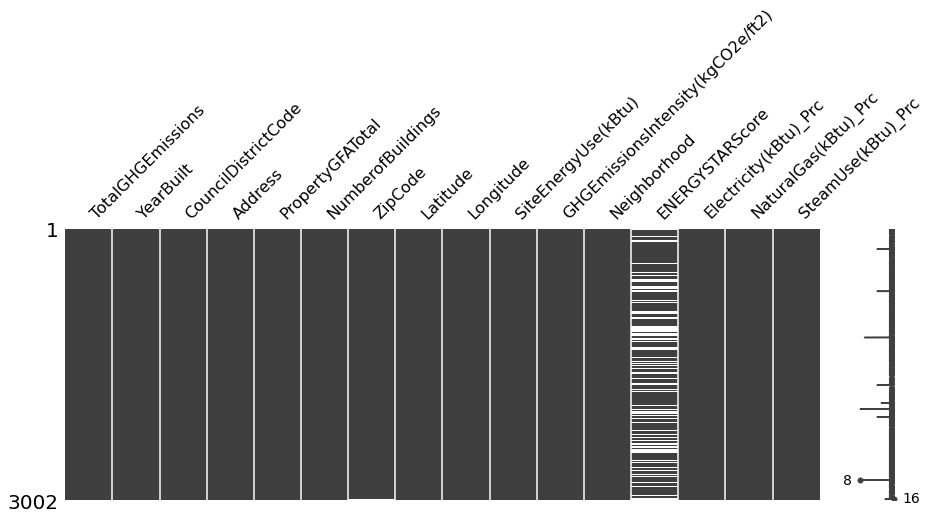

In [157]:
# GRAPHIQUE VALEURS MANQUANTES
msno.matrix(df15_16,figsize=(15,5))

<AxesSubplot:>

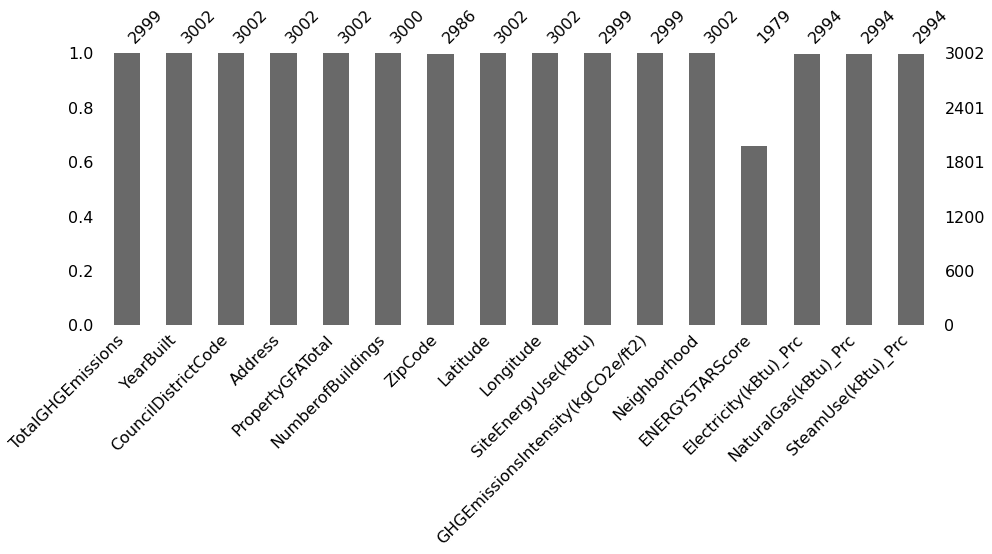

In [158]:
# GRAPHIQUES A BARRES DES VALEURS MANQUANTES
msno.bar(df15_16,figsize=(15,5))

In [159]:
# Calcul des pourcentages
nbre_tot_cellules=df15_16.shape[0]*df15_16.shape[1]

In [160]:
# 1-Pourcentage de valeurs manquantes
print("Pourcentage total de valeurs manquantes:",(nbre_tot_cellules-df15_16.count().sum())/nbre_tot_cellules*100)

Pourcentage total de valeurs manquantes: 2.2360093271152564


In [161]:
# 2-Pourcentage de valeurs manquantes
print("Pourcentage total de valeurs presentes:",(df15_16.count().sum())/nbre_tot_cellules*100)

Pourcentage total de valeurs presentes: 97.76399067288474


**Toutes les valeurs manquantes peuvent etre supprimées**

-Car leur nombre est trop grand pour la variable 'ENERGYSTARScore'

-et trop petit pour les autres variables.

In [162]:
# df15_16.shape

In [163]:
# SUPPRESSION DES OBSERVATIONS AVEC VALEURS MANQUANTES
df15_16.dropna(inplace=True)

In [164]:
# VERIFICATION
df15_16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1975 entries, 1 to 3347
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   TotalGHGEmissions                  1975 non-null   float64
 1   YearBuilt                          1975 non-null   int64  
 2   CouncilDistrictCode                1975 non-null   int64  
 3   Address                            1975 non-null   object 
 4   PropertyGFATotal                   1975 non-null   int64  
 5   NumberofBuildings                  1975 non-null   float64
 6   ZipCode                            1975 non-null   object 
 7   Latitude                           1975 non-null   object 
 8   Longitude                          1975 non-null   object 
 9   SiteEnergyUse(kBtu)                1975 non-null   float64
 10  GHGEmissionsIntensity(kgCO2e/ft2)  1975 non-null   float64
 11  Neighborhood                       1975 non-null   objec

## Données dupliquées

In [165]:
print("Nombre d'obsevations dupliquées:",df15_16.duplicated().sum())

Nombre d'obsevations dupliquées: 0


## Type des variables

In [166]:
# TYPE 
# df15_16.columns.to_list()
df15_16.dtypes

TotalGHGEmissions                    float64
YearBuilt                              int64
CouncilDistrictCode                    int64
Address                               object
PropertyGFATotal                       int64
NumberofBuildings                    float64
ZipCode                               object
Latitude                              object
Longitude                             object
SiteEnergyUse(kBtu)                  float64
GHGEmissionsIntensity(kgCO2e/ft2)    float64
Neighborhood                          object
ENERGYSTARScore                      float64
Electricity(kBtu)_Prc                float64
NaturalGas(kBtu)_Prc                 float64
SteamUse(kBtu)_Prc                   float64
dtype: object

In [167]:
# CONVERSION DE VARIABLES                 TODO  TODO
df15_16['Longitude']=df15_16['Longitude'].astype('float64')
# df15_16['Latitude']=df15_16['Latitude'].astype('float64')

In [168]:
df15_16.dtypes

TotalGHGEmissions                    float64
YearBuilt                              int64
CouncilDistrictCode                    int64
Address                               object
PropertyGFATotal                       int64
NumberofBuildings                    float64
ZipCode                               object
Latitude                              object
Longitude                            float64
SiteEnergyUse(kBtu)                  float64
GHGEmissionsIntensity(kgCO2e/ft2)    float64
Neighborhood                          object
ENERGYSTARScore                      float64
Electricity(kBtu)_Prc                float64
NaturalGas(kBtu)_Prc                 float64
SteamUse(kBtu)_Prc                   float64
dtype: object

In [169]:
# REORGANISATION DES COLONNES
liste_new_order=['Longitude', 
                 'Latitude',
                 'Address',
                 'GHGEmissionsIntensity(kgCO2e/ft2)',
                 'CouncilDistrictCode',
                 'Neighborhood',
                 'NumberofBuildings',
                 'YearBuilt', 
                 'ZipCode',
                 'PropertyGFATotal',
                 'Electricity(kBtu)_Prc',
                 'NaturalGas(kBtu)_Prc', 
                 'SteamUse(kBtu)_Prc',
                 'ENERGYSTARScore',
                 'TotalGHGEmissions',
                 'SiteEnergyUse(kBtu)']

# CHANGEMENT ORDRE
df15_16=df15_16[liste_new_order]


 # Sauvegarde Données

In [170]:
df15_16.to_csv('df15_16_clean.csv')